# Normal Distribution

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_red = pd.read_csv("./data/winequality-red(processed).csv", encoding='utf-8')
df_white = pd.read_csv("./data/winequality-white(processed).csv")

In [3]:
print(df_red.shape)
df_red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df_white.shape)
df_white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


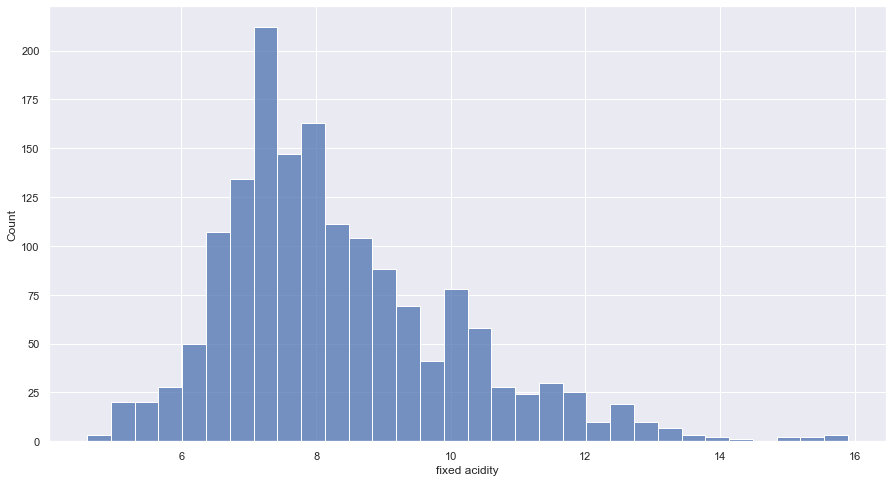

In [5]:
sns.histplot(df_red['fixed acidity'])
plt.show()

In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red['fixed acidity'].mean()

8.319637273295838

In [8]:
mu = df_red['fixed acidity'].mean()
sigma = df_red['fixed acidity'].std()
print(mu, sigma)

8.319637273295838 1.7410963181277006


### norm

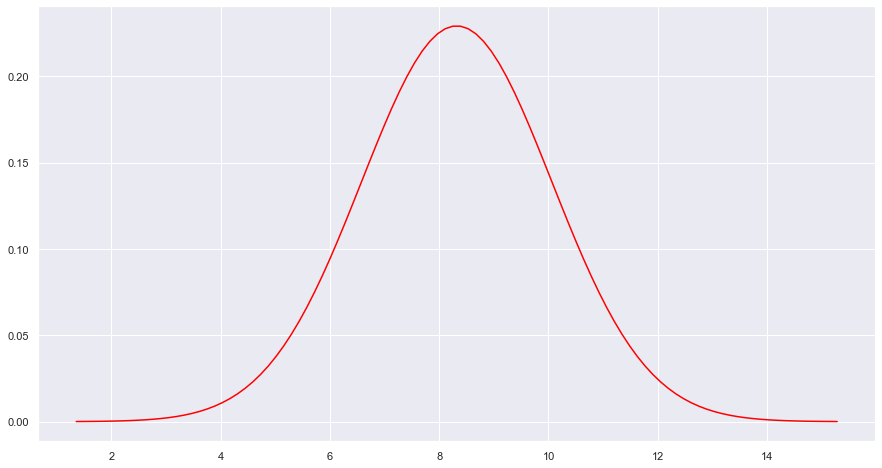

In [9]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y,'red')
plt.show()

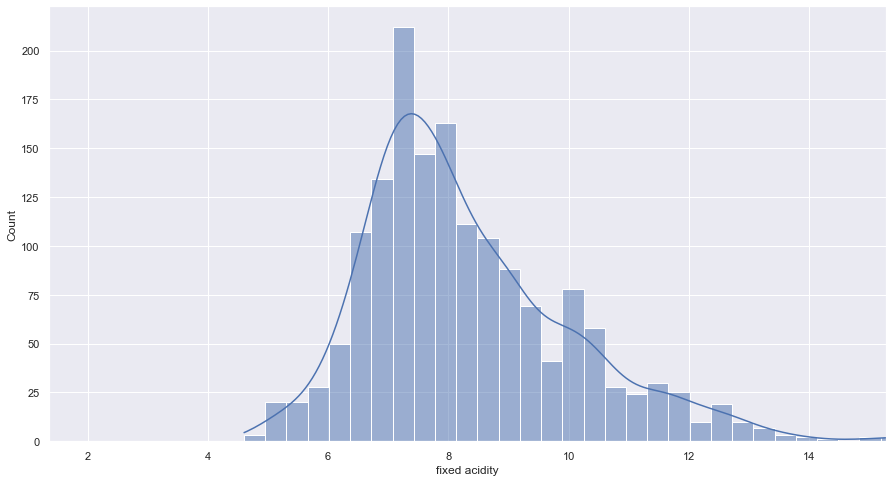

In [10]:
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.show()

In [11]:
mu-1

7.319637273295838

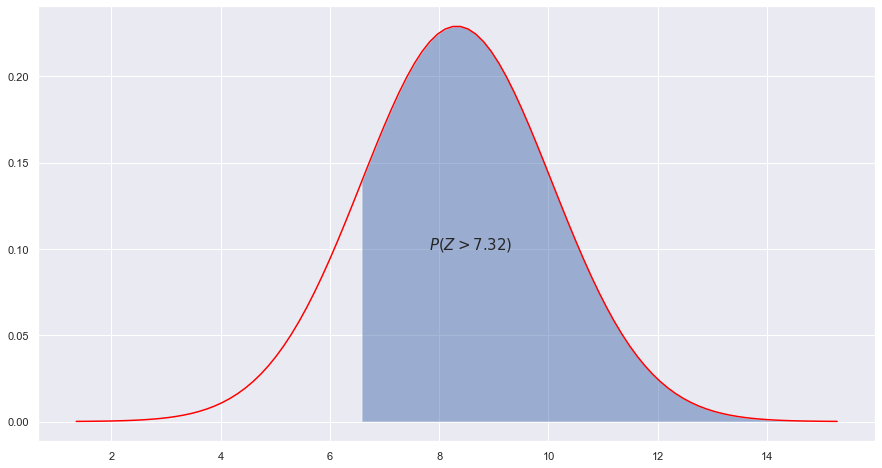

In [12]:
xx = np.linspace(mu-1*sigma, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)
plt.plot(x, y,'red')
plt.fill_between(xx, yy, alpha=0.5)
plt.text(mu-0.5, 0.1, '$P(Z>7.32)$', fontsize=15)
plt.show()

In [13]:
# 레드와인의 fixed acidity가 mu-1보다 클 확률은 71.7%다
1-stats.norm.cdf(loc=mu, scale=sigma, x=(mu-1))

0.7171347680622043

상위 10% 값 : 10.550941985556332
하위 10% 값 : 6.088332561035344


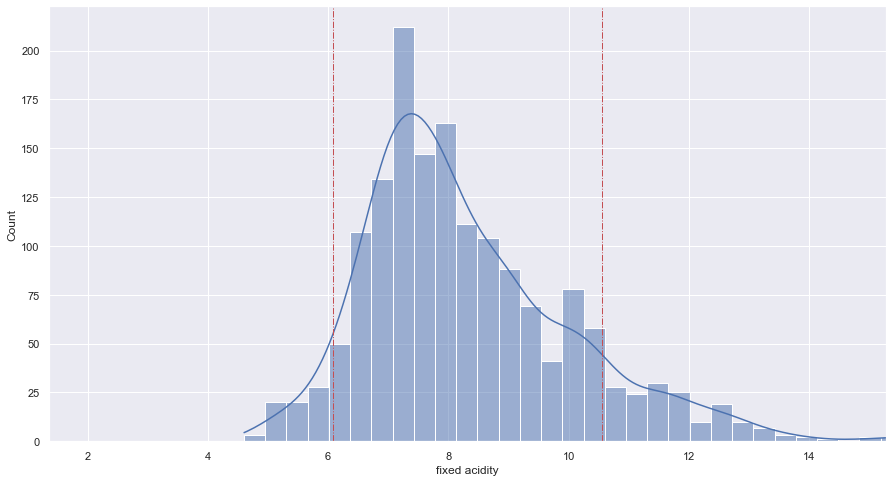

In [14]:
#Percent point function
print(f'상위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.9)}')
print(f'하위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.1)}')
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.9), linestyle='-.', color='r', linewidth=1)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.1), linestyle='-.', color='r', linewidth=1)
plt.show()

상위 10% 값 : 17.37218479452509
하위 10% 값 : -0.7329102477630567


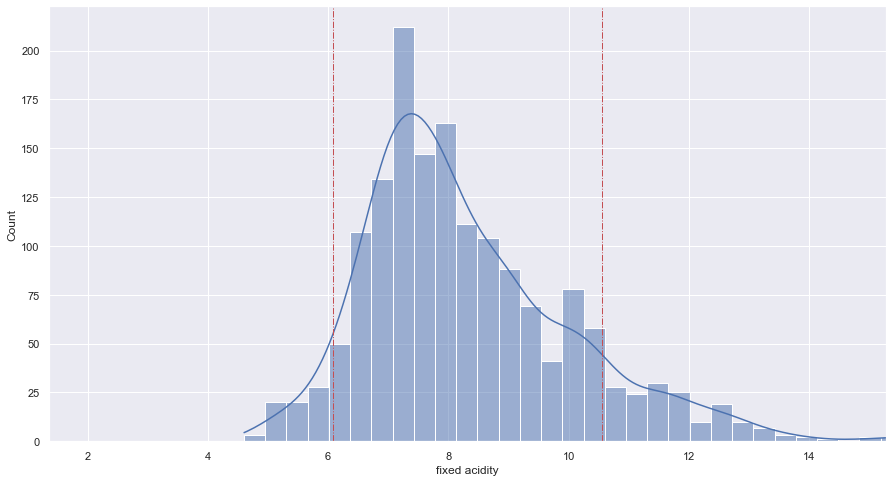

In [20]:
# Percent point function
# 정규분포와 유사하지 않다면 음의 값이 나올 수 있다.
print(f'상위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.9999999)}')
print(f'하위 10% 값 : {stats.norm.ppf(loc=mu, scale=sigma, q=0.0000001)}')
sns.histplot(df_red['fixed acidity'], kde=True)
plt.xlim(mu-4*sigma, mu+4*sigma)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.9), linestyle='-.', color='r', linewidth=1)
plt.axvline(stats.norm.ppf(loc=mu, scale=sigma, q=0.1), linestyle='-.', color='r', linewidth=1)
plt.show()

In [15]:
df_red['fixed acidity'].describe(percentiles=[0.1, 0.9])

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
10%         6.500000
50%         7.900000
90%        10.700000
max        15.900000
Name: fixed acidity, dtype: float64

### t

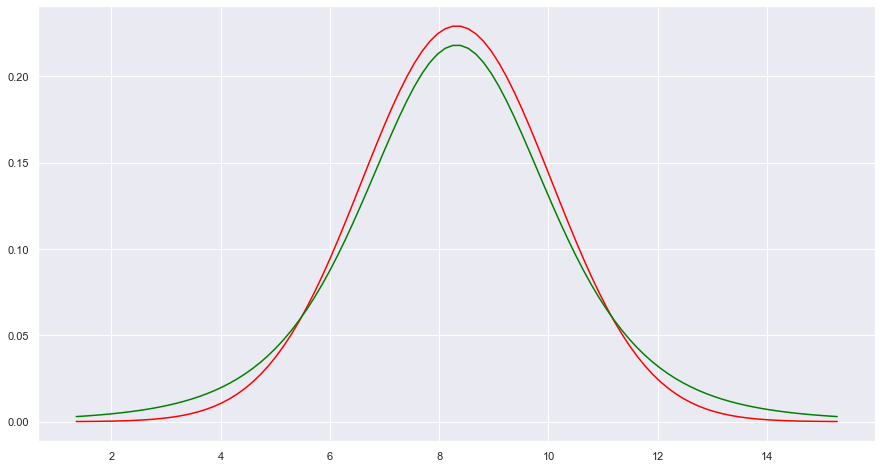

In [16]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y_norm = stats.norm.pdf(x, mu, sigma)
y_t = stats.t.pdf(x, loc=mu, scale=sigma, df=5)

plt.plot(x, y_norm,'red')
plt.plot(x, y_t,'green')
plt.show()

### Chi Square

In [21]:
df_red.shape

(1599, 12)

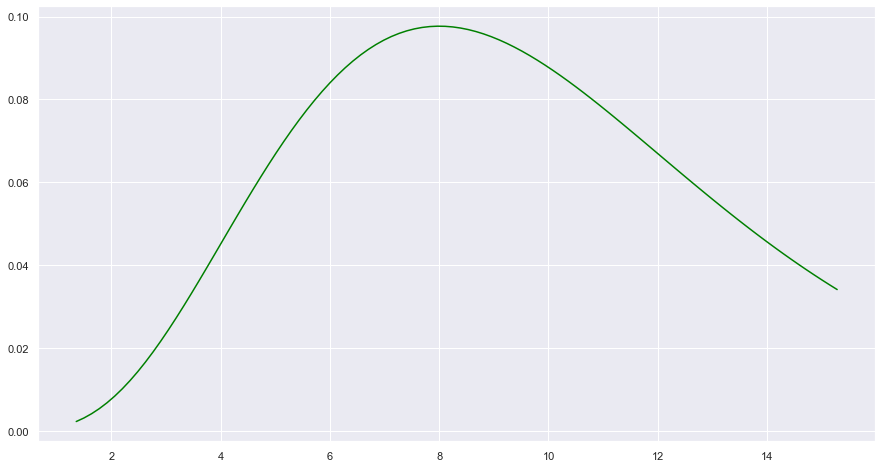

In [38]:
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
# y_norm = stats.norm.pdf(x, mu, sigma)
y_chi2 = stats.chi2.pdf(x=x, df=10)

# plt.plot(x, y_norm,'red')
plt.plot(x, y_chi2,'green')
plt.show()

In [39]:
import statsmodels.api as sm
import pylab as py

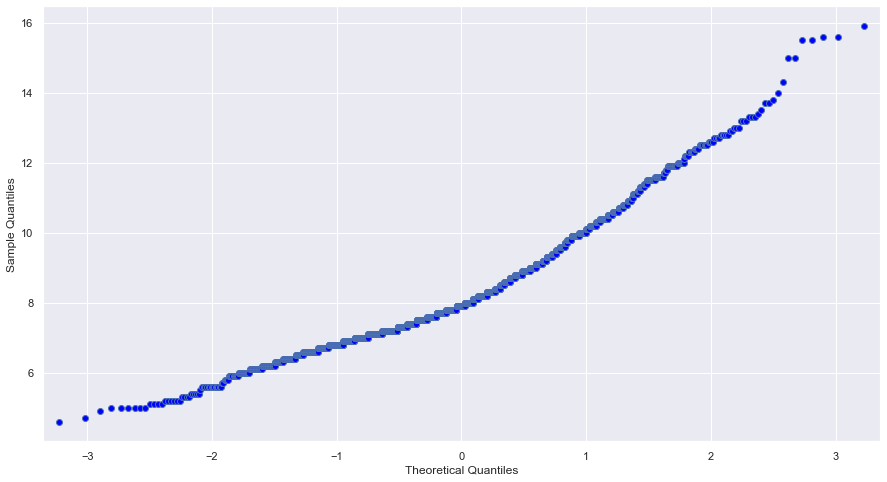

In [47]:
sm.qqplot(df_red['fixed acidity'])
py.show()

In [48]:
stats.shapiro(df_red['fixed acidity'])

ShapiroResult(statistic=0.942030668258667, pvalue=1.5255951637239901e-24)

In [49]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

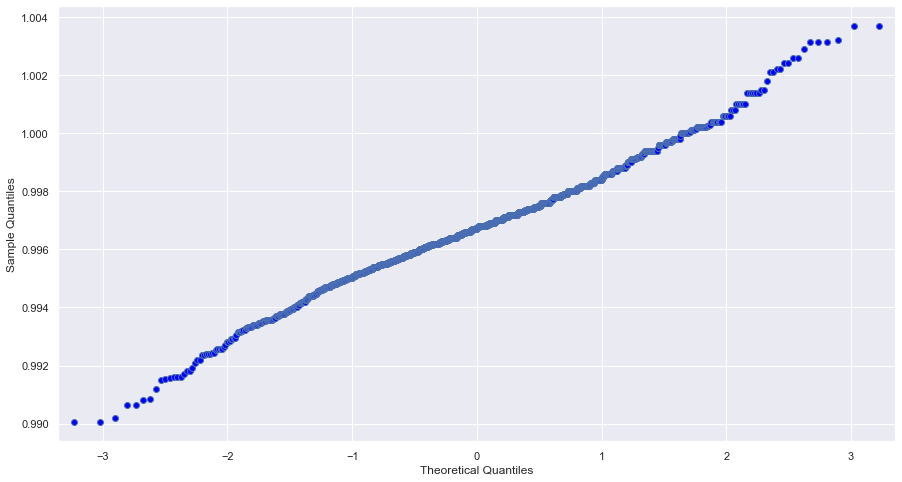

In [56]:
sm.qqplot(df_red['density'])
py.show()

In [57]:
stats.shapiro(df_red['density'])

ShapiroResult(statistic=0.9908668398857117, pvalue=1.9400959061499634e-08)

- 샘플링 했을때는 정규성 검정을 만족하는 변수들이 있다. 아웃라이어가 존재한다고 판단

In [62]:
for q in df_red.columns:
    print(q, stats.shapiro(df_red[q].sample(50)), "\n")

fixed acidity ShapiroResult(statistic=0.9235777258872986, pvalue=0.003183490363880992) 

volatile acidity ShapiroResult(statistic=0.9327234625816345, pvalue=0.007016313727945089) 

citric acid ShapiroResult(statistic=0.9482629895210266, pvalue=0.028959115967154503) 

residual sugar ShapiroResult(statistic=0.4943568706512451, pvalue=6.996148885912712e-12) 

chlorides ShapiroResult(statistic=0.5541295409202576, pvalue=4.3005137645435454e-11) 

free sulfur dioxide ShapiroResult(statistic=0.9508829116821289, pvalue=0.037090886384248734) 

total sulfur dioxide ShapiroResult(statistic=0.8545145988464355, pvalue=2.0546283849398606e-05) 

density ShapiroResult(statistic=0.9795300364494324, pvalue=0.532316267490387) 

pH ShapiroResult(statistic=0.9654045701026917, pvalue=0.1496272087097168) 

sulphates ShapiroResult(statistic=0.9570503234863281, pvalue=0.06689265370368958) 

alcohol ShapiroResult(statistic=0.9327359795570374, pvalue=0.0070240735076367855) 

quality ShapiroResult(statistic=0.830

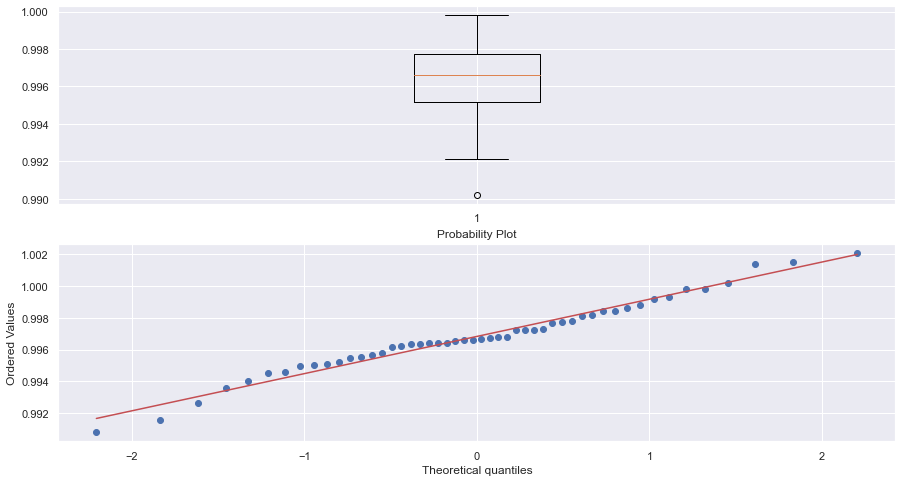

In [98]:
from scipy.stats import probplot

np.random.seed(0)
f, axes = plt.subplots(2, 1)
axes[0].boxplot(df_red['density'].sample(50))
probplot(df_red['density'].sample(50), plot=axes[1])
plt.show()